In [1]:
import whisper
import torchaudio
import matplotlib.pyplot as plt
import numpy as np
from jiwer import wer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from jiwer import mer, wil
import os
import nemo.collections.asr as nemo_asr
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC,HubertForCTC
import torch

c:\Users\ASUS\anaconda3\envs\Speech2Text\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[NeMo W 2024-11-13 14:40:16 nemo_logging:393] c:\Users\ASUS\anaconda3\envs\Speech2Text\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
      warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
    
[NeMo W 2024-11-13 14:40:19 nemo_logging:393] Could not import NeMo NLP collection which is required for speech translation model.


In [2]:
timit_path = r"timit\data\TRAIN\DR1\FCJF0"
audio_file = os.path.join(timit_path, "SA1.WAV")

In [3]:
os.environ["PATH"] += os.pathsep + r"C:\ffmpeg\bin"  

In [4]:
waveform, sample_rate = torchaudio.load(audio_file)

squeezed_waveform = waveform.squeeze()

if sample_rate != 16000:
    waveform = torchaudio.transforms.Resample(sample_rate, 16000)(waveform)

if sample_rate != 16000:
    squeezed_waveform = torchaudio.transforms.Resample(sample_rate, 16000)(squeezed_waveform)
    
temp_audio_path = "temp.wav"
torchaudio.save(temp_audio_path, waveform, 16000)

ground_truth_text = "She had your dark suit in greasy wash water all year"


In [5]:
jasper_model = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_en_jasper10x5dr")

quartz_model = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_en_quartznet15x5")

wav_processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
wav_model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

hubert_processor = Wav2Vec2Processor.from_pretrained("facebook/hubert-large-ls960-ft")
hubert_model = HubertForCTC.from_pretrained("facebook/hubert-large-ls960-ft")

whisper_model = whisper.load_model("base") 

[NeMo I 2024-11-12 23:40:15 nemo_logging:381] Found existing object C:\Users\51man\.cache\torch\NeMo\NeMo_1.21.0\stt_en_jasper10x5dr\856ae08d5c4bd78b5e27f696e96f7aab\stt_en_jasper10x5dr.nemo.
[NeMo I 2024-11-12 23:40:15 nemo_logging:381] Re-using file from: C:\Users\51man\.cache\torch\NeMo\NeMo_1.21.0\stt_en_jasper10x5dr\856ae08d5c4bd78b5e27f696e96f7aab\stt_en_jasper10x5dr.nemo
[NeMo I 2024-11-12 23:40:15 nemo_logging:381] Instantiating model from pre-trained checkpoint


[NeMo W 2024-11-12 23:40:25 nemo_logging:393] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /data2/voices/train_1k.json
    sample_rate: 16000
    labels:
    - ' '
    - a
    - b
    - c
    - d
    - e
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - m
    - 'n'
    - o
    - p
    - q
    - r
    - s
    - t
    - u
    - v
    - w
    - x
    - 'y'
    - z
    - ''''
    batch_size: 32
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    
[NeMo W 2024-11-12 23:40:25 nemo_logging:393] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath:

[NeMo I 2024-11-12 23:40:25 nemo_logging:381] PADDING: 16


[NeMo W 2024-11-12 23:40:30 nemo_logging:393] d:\Anaconda\Lib\site-packages\nemo\core\connectors\save_restore_connector.py:568: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
 

[NeMo I 2024-11-12 23:40:35 nemo_logging:381] Model EncDecCTCModel was successfully restored from C:\Users\51man\.cache\torch\NeMo\NeMo_1.21.0\stt_en_jasper10x5dr\856ae08d5c4bd78b5e27f696e96f7aab\stt_en_jasper10x5dr.nemo.
[NeMo I 2024-11-12 23:40:35 nemo_logging:381] Found existing object C:\Users\51man\.cache\torch\NeMo\NeMo_1.21.0\stt_en_quartznet15x5\16661021d16e679bdfd97a2a03944c49\stt_en_quartznet15x5.nemo.
[NeMo I 2024-11-12 23:40:35 nemo_logging:381] Re-using file from: C:\Users\51man\.cache\torch\NeMo\NeMo_1.21.0\stt_en_quartznet15x5\16661021d16e679bdfd97a2a03944c49\stt_en_quartznet15x5.nemo
[NeMo I 2024-11-12 23:40:35 nemo_logging:381] Instantiating model from pre-trained checkpoint


[NeMo W 2024-11-12 23:40:36 nemo_logging:393] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /data2/voices/train_1k.json
    sample_rate: 16000
    labels:
    - ' '
    - a
    - b
    - c
    - d
    - e
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - m
    - 'n'
    - o
    - p
    - q
    - r
    - s
    - t
    - u
    - v
    - w
    - x
    - 'y'
    - z
    - ''''
    batch_size: 32
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: /asr_set_1.2/train/train_{0..1023}.tar
    num_workers: 20
    
[NeMo W 2024-11-12 23:40:36 nemo_logging:393] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loade

[NeMo I 2024-11-12 23:40:36 nemo_logging:381] PADDING: 16
[NeMo I 2024-11-12 23:40:37 nemo_logging:381] Model EncDecCTCModel was successfully restored from C:\Users\51man\.cache\torch\NeMo\NeMo_1.21.0\stt_en_quartznet15x5\16661021d16e679bdfd97a2a03944c49\stt_en_quartznet15x5.nemo.


Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_v', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You sho

In [6]:
jasper_predicted_text = jasper_model.transcribe([temp_audio_path])[0]
print("Jasper Predicted Text:", jasper_predicted_text)


quartz_predicted_text = quartz_model.transcribe([temp_audio_path])[0]
print("QuartzNet Predicted Text:", quartz_predicted_text)


inputs = wav_processor(squeezed_waveform, sampling_rate=16000, return_tensors="pt", padding=True)
input_values = inputs.input_values
with torch.no_grad():
    logits = wav_model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)
wav2vec_predicted_text = wav_processor.batch_decode(predicted_ids)[0]
print("Wav2Vec2 Predicted Text:", wav2vec_predicted_text)


inputs = hubert_processor(squeezed_waveform, sampling_rate=16000, return_tensors="pt")
with torch.no_grad():
    logits = hubert_model(inputs.input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
hubert_predicted_text = hubert_processor.batch_decode(predicted_ids)[0]
print("Hubert Predicted Text:", hubert_predicted_text)


result = whisper_model.transcribe(temp_audio_path)
whisper_predicted_text= result['text']
print("Whisper Predicted Text:", whisper_predicted_text)

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

[NeMo W 2024-11-12 23:40:50 nemo_logging:393] d:\Anaconda\Lib\site-packages\nemo\collections\asr\parts\preprocessing\features.py:417: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
      with torch.cuda.amp.autocast(enabled=False):
    


Jasper Predicted Text: she had your duck suit and greasy washwater all year


Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

QuartzNet Predicted Text: she had a duck suit and greasy wash water all year
Wav2Vec2 Predicted Text: SHE HAD YOUR DUCK SUP AND GREASY WASHWATER ALL YEAR


[NeMo W 2024-11-12 23:40:58 nemo_logging:393] d:\Anaconda\Lib\site-packages\whisper\transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
      warnings.warn("FP16 is not supported on CPU; using FP32 instead")
    


Hubert Predicted Text: SHE HAD YOUR DUCK SUIT AN GREASY WASHWATER ALL YEAR
Whisper Predicted Text:  She had a dark suit in greasy washwater all year.


In [7]:
def error_rates(model_name,predicted_text):
    error_rate = wer(ground_truth_text.lower(), predicted_text.lower())
    match_error_rate = mer(ground_truth_text.lower(), predicted_text.lower())
    wil_rate = wil(ground_truth_text.lower(), predicted_text.lower())
    print(f"{model_name} Model Word Error Rate:", error_rate)
    print(f"{model_name} Model Match Error Rate:", match_error_rate)
    print(f"{model_name} Model Word Information Lost Rate:", wil_rate)
    print()
    return error_rate,match_error_rate,wil_rate

In [8]:
predicted_texts = [jasper_predicted_text,quartz_predicted_text,wav2vec_predicted_text,hubert_predicted_text,whisper_predicted_text]
model_names=['Jasper(NVIDIA)','QuartzNet(NVIDIA)','Wav2Vec2(Facebook AI)','Hubert(Facebook AI)','Whisper(openAI)']

In [9]:
word_error_rates=[]
match_error_rates=[]
word_information_lost_rates=[]
for i in range(len(model_names)):
    errors =  error_rates(model_names[i],predicted_texts[i])
    word_error_rates.append(errors[0])
    match_error_rates.append(errors[1])
    word_information_lost_rates.append(errors[2])

Jasper(NVIDIA) Model Word Error Rate: 0.36363636363636365
Jasper(NVIDIA) Model Match Error Rate: 0.36363636363636365
Jasper(NVIDIA) Model Word Information Lost Rate: 0.5545454545454546

QuartzNet(NVIDIA) Model Word Error Rate: 0.2727272727272727
QuartzNet(NVIDIA) Model Match Error Rate: 0.2727272727272727
QuartzNet(NVIDIA) Model Word Information Lost Rate: 0.47107438016528924

Wav2Vec2(Facebook AI) Model Word Error Rate: 0.45454545454545453
Wav2Vec2(Facebook AI) Model Match Error Rate: 0.45454545454545453
Wav2Vec2(Facebook AI) Model Word Information Lost Rate: 0.6727272727272728

Hubert(Facebook AI) Model Word Error Rate: 0.36363636363636365
Hubert(Facebook AI) Model Match Error Rate: 0.36363636363636365
Hubert(Facebook AI) Model Word Information Lost Rate: 0.5545454545454546

Whisper(openAI) Model Word Error Rate: 0.36363636363636365
Whisper(openAI) Model Match Error Rate: 0.36363636363636365
Whisper(openAI) Model Word Information Lost Rate: 0.5545454545454546



In [10]:
def plot_errors(metrics,title):    
    plt.figure(figsize=(5, 5))
    plt.barh(model_names,metrics)
    plt.xlim(0, 1)
    plt.title(title)
    plt.xlabel("Error/Loss Rate")
    plt.ylabel("Models")
    for index, value in enumerate(metrics):
        plt.text(round(value,2), index,str(round(value,3)))
    plt.show()

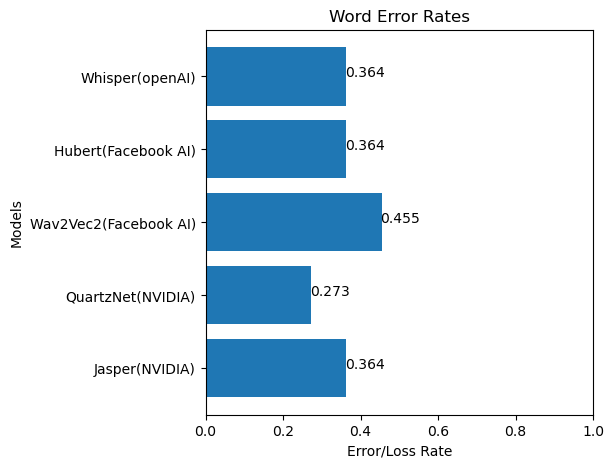

In [11]:
plot_errors(word_error_rates,'Word Error Rates')

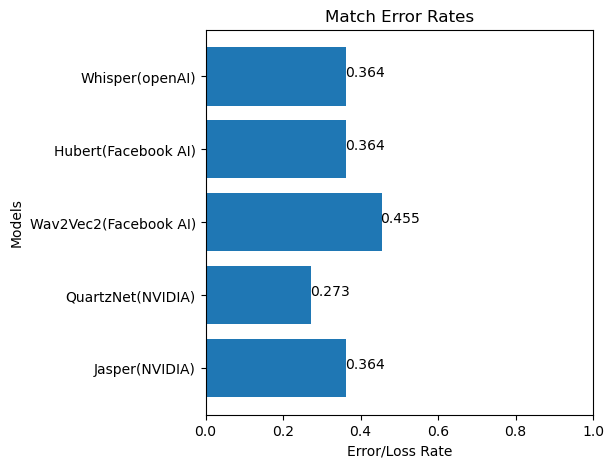

In [12]:
plot_errors(match_error_rates,'Match Error Rates')

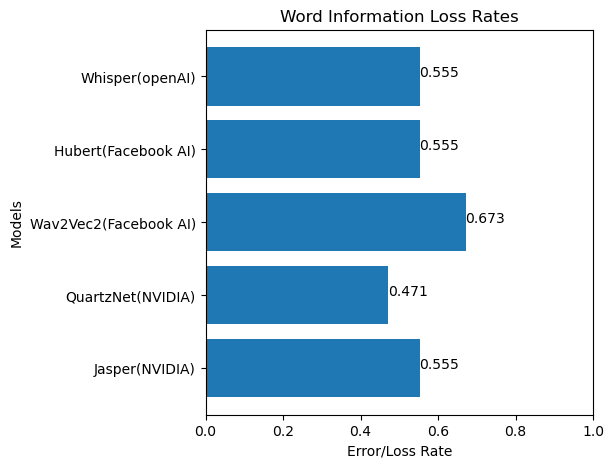

In [13]:
plot_errors(word_information_lost_rates,'Word Information Loss Rates')

In [14]:
def visualize_pronunciation(ground_truth, prediction,model_name):
    ground_truth_words = ground_truth.split()
    predicted_words = prediction.split()
    
    fig, ax = plt.subplots()
    for idx, word in enumerate(ground_truth_words):
        color = 'green' if idx < len(predicted_words) and word.lower() == predicted_words[idx].lower() else 'red'
        ax.text(idx * 0.1, 0.5, word, color=color, fontsize=12, ha='center')
    ax.axis('off')
    ax.set_title(f'{model_name} Model')
    plt.show()

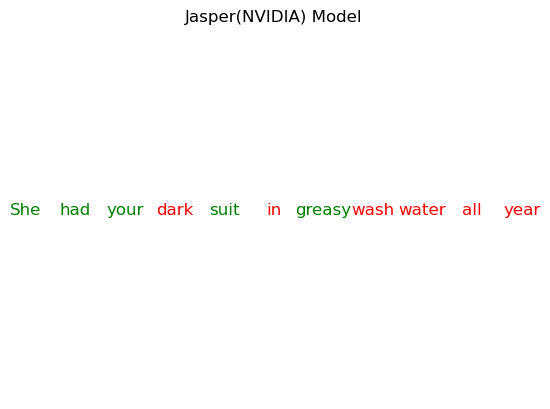

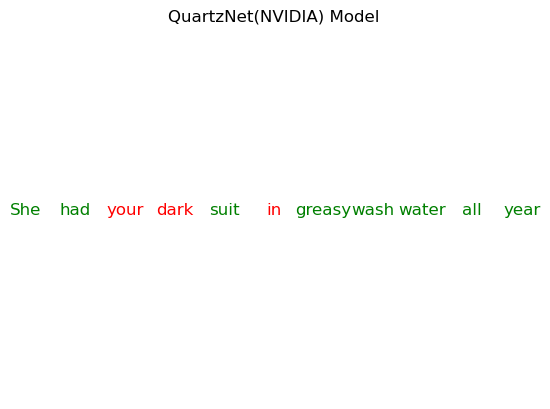

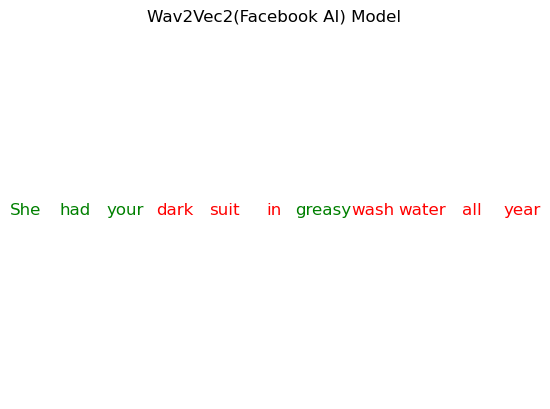

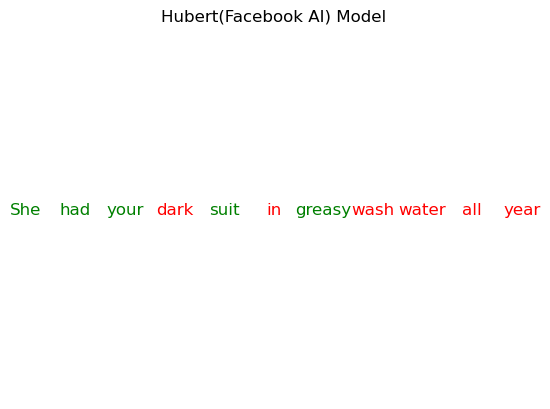

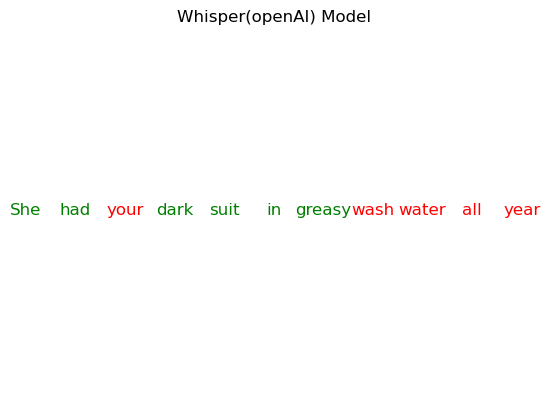

In [15]:

visualize_pronunciation(ground_truth_text, jasper_predicted_text,'Jasper(NVIDIA)')

visualize_pronunciation(ground_truth_text, quartz_predicted_text,'QuartzNet(NVIDIA)')

visualize_pronunciation(ground_truth_text, wav2vec_predicted_text,'Wav2Vec2(Facebook AI)')

visualize_pronunciation(ground_truth_text, hubert_predicted_text,'Hubert(Facebook AI)')

visualize_pronunciation(ground_truth_text, whisper_predicted_text,'Whisper(openAI)')

In [16]:
accuracy_scores=[]
precision_scores=[]
recall_scores=[]
f1_scores=[]

In [17]:
def get_labels(ground_truth, prediction):
    ground_truth_words = ground_truth.split()
    predicted_words = prediction.split()
    labels = [1 if gt.lower() == pd.lower() else 0 for gt, pd in zip(ground_truth_words, predicted_words)]
    return labels

for i in range(len(model_names)):
    labels = get_labels(ground_truth_text, predicted_texts[i])

    accuracy = accuracy_score([1]*len(labels), labels)
    precision = precision_score([1]*len(labels), labels)
    recall = recall_score([1]*len(labels), labels)
    f1 = f1_score([1]*len(labels), labels)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    model = model_names[i]
    print(f"{model} Model's Accuracy: {accuracy:.2f}")
    print(f"{model} Model's Precision: {precision:.2f}")
    print(f"{model} Model's Recall: {recall:.2f}")
    print(f"{model} Model's F1 Score: {f1:.2f}")
    print()

Jasper(NVIDIA) Model's Accuracy: 0.50
Jasper(NVIDIA) Model's Precision: 1.00
Jasper(NVIDIA) Model's Recall: 0.50
Jasper(NVIDIA) Model's F1 Score: 0.67

QuartzNet(NVIDIA) Model's Accuracy: 0.73
QuartzNet(NVIDIA) Model's Precision: 1.00
QuartzNet(NVIDIA) Model's Recall: 0.73
QuartzNet(NVIDIA) Model's F1 Score: 0.84

Wav2Vec2(Facebook AI) Model's Accuracy: 0.40
Wav2Vec2(Facebook AI) Model's Precision: 1.00
Wav2Vec2(Facebook AI) Model's Recall: 0.40
Wav2Vec2(Facebook AI) Model's F1 Score: 0.57

Hubert(Facebook AI) Model's Accuracy: 0.50
Hubert(Facebook AI) Model's Precision: 1.00
Hubert(Facebook AI) Model's Recall: 0.50
Hubert(Facebook AI) Model's F1 Score: 0.67

Whisper(openAI) Model's Accuracy: 0.60
Whisper(openAI) Model's Precision: 1.00
Whisper(openAI) Model's Recall: 0.60
Whisper(openAI) Model's F1 Score: 0.75



In [18]:
def plot_metrics(metrics,title):    
    plt.figure(figsize=(5, 5))
    plt.barh(model_names,metrics)
    plt.xlim(0, 1)
    plt.title(title)
    plt.xlabel("Metric Score")
    plt.ylabel("Models")
    for index, value in enumerate(metrics):
        plt.text(round(value,3), index,str(round(value,3)))
    plt.show()

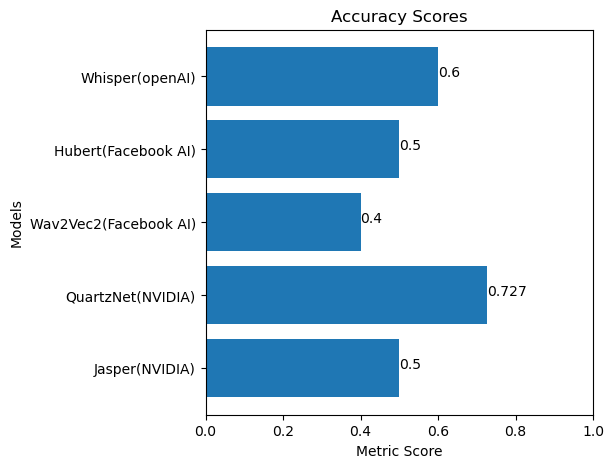

In [19]:
plot_metrics(accuracy_scores,'Accuracy Scores')

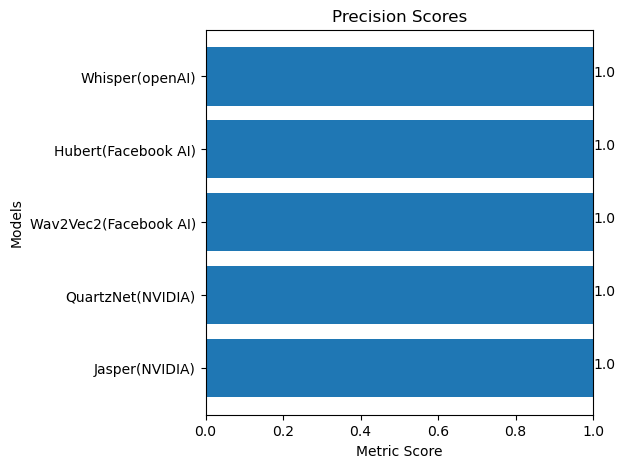

In [20]:
plot_metrics(precision_scores,'Precision Scores')

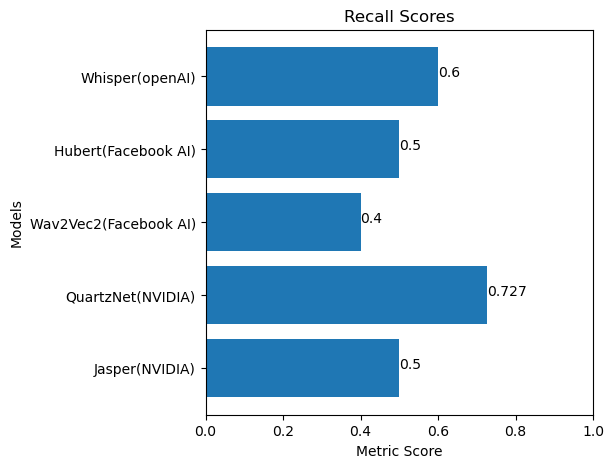

In [21]:
plot_metrics(recall_scores,'Recall Scores')

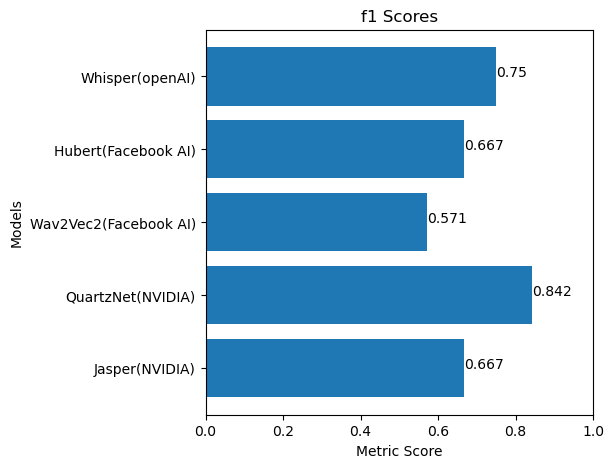

In [22]:
plot_metrics(f1_scores,'f1 Scores')